In [1]:
%load_ext autoreload
%autoreload 2

## Unsupervised Learning and Extraction of Blinking Patterns

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import espbm

### Data Loading

In [3]:
ear_data = pd.read_csv("data/sample_ear_short.csv")
display(ear_data.head())

ear_l = ear_data["EAR_l"].values
ear_r = ear_data["EAR_r"].values

,Frame,EAR_r,EAR_l
0,0,0.286274,0.269362
1,1,0.291212,0.268412
2,2,0.291212,0.269362
3,3,0.297798,0.270195
4,4,0.291479,0.269233


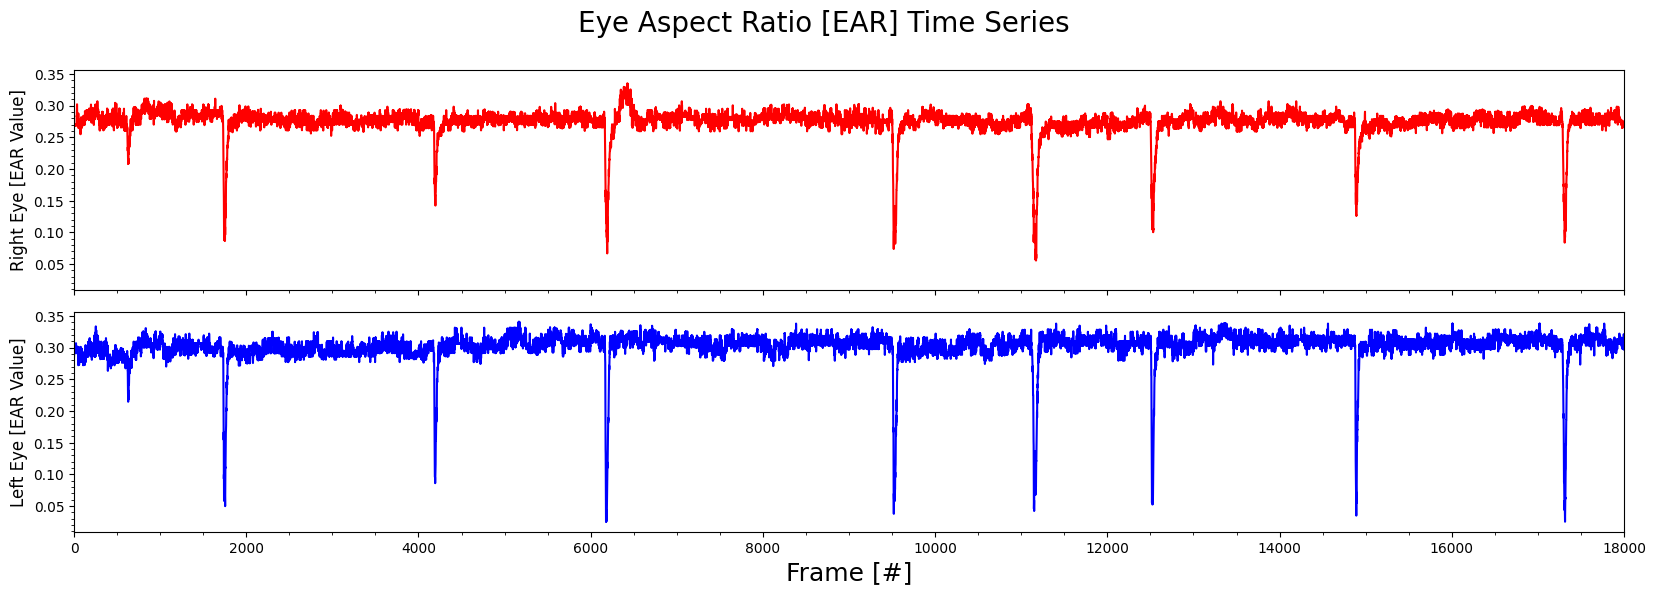

In [4]:
espbm.plot.ear_time_series(ear_l, ear_r)
plt.show()

----

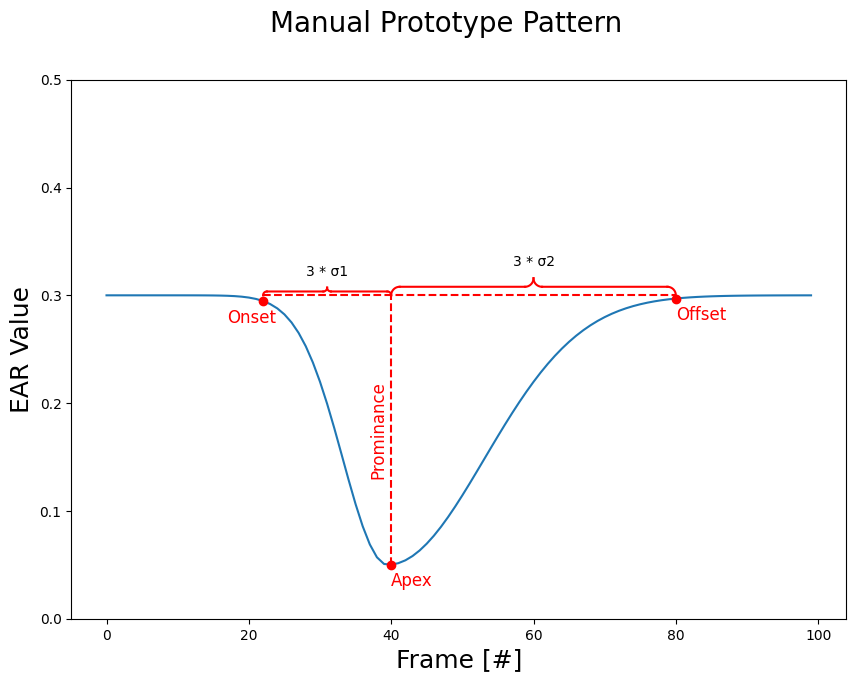

In [5]:
prototype, params = espbm.manual.define_prototype(return_params=True)
espbm.plot.manual_prototype(prototype=prototype, params=params)
plt.show()

In [6]:
matches_l = espbm.match.find_prototype(ear_l, prototype, max_prototype_distance=3.0)
matches_r = espbm.match.find_prototype(ear_r, prototype, max_prototype_distance=3.0)

/home/buechner/anaconda3/envs/espbm/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [7]:
espbm.match.describe(matches_l)

Contains 11 matches
Matches: [[589, 689, 3.5358267697667203], [1708, 1808, 3.0173705742151613], [2947, 3047, 7.50379639420479], [4154, 4254, 2.549847694541923], [6146, 6246, 3.8319857889474234], [6688, 6788, 7.9008293941488486], [9486, 9586, 5.908257854329013], [11121, 11221, 5.947827087428848], [12484, 12584, 4.0799082441139225], [14851, 14951, 3.5085707593298734], [17270, 17370, 3.6808498247376025]]


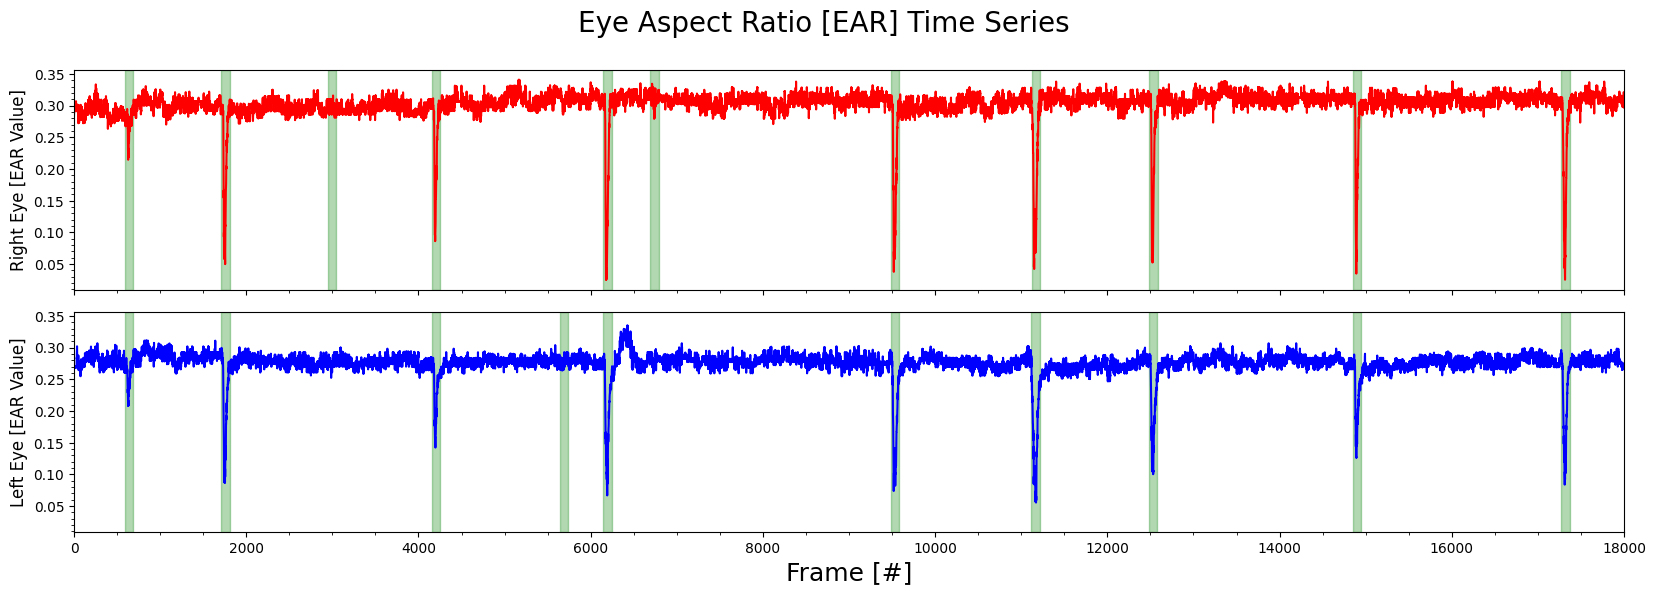

In [8]:
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

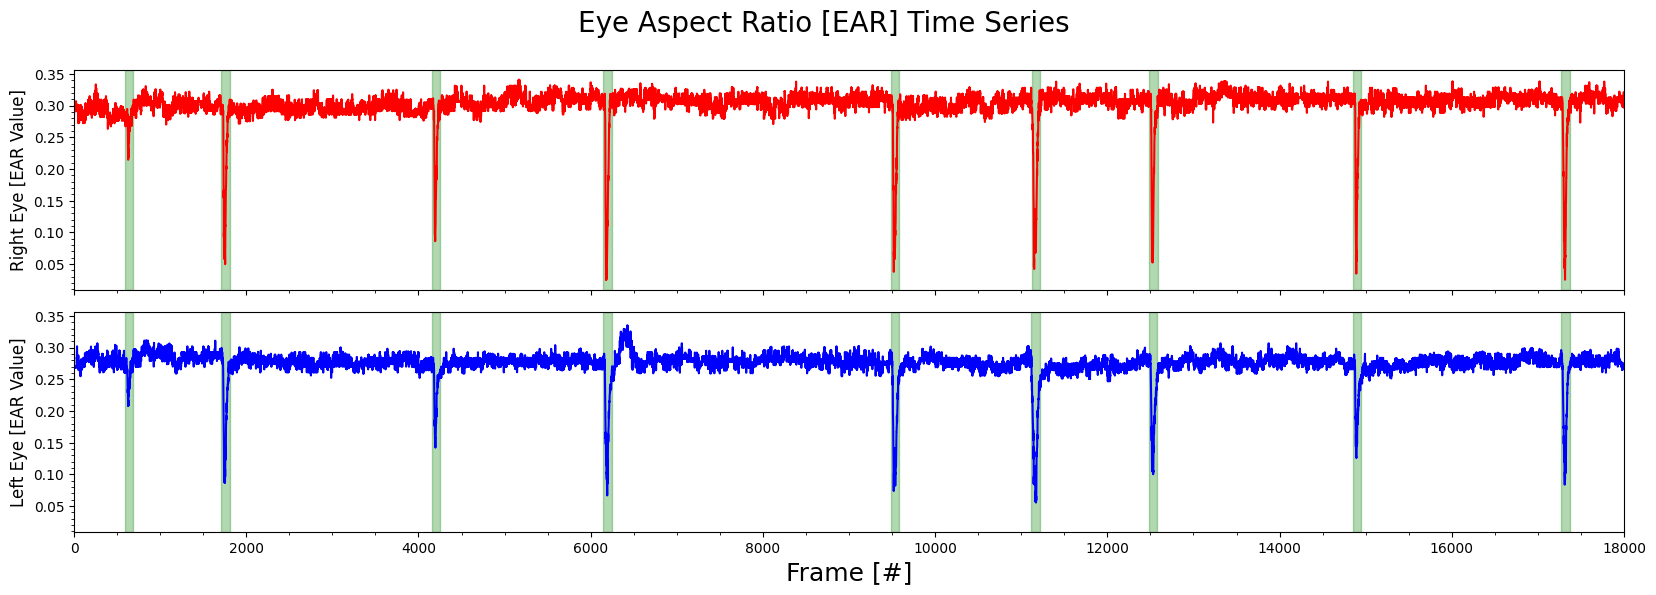

In [9]:
matches_l = espbm.match.find_prototype(ear_l, prototype)
matches_r = espbm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = espbm.match.index_matching(matches_l, matches_r)
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

### Interactive Demo

In [10]:
from ipywidgets import interact

In [11]:
# interactive selection of prototype parameters
@interact(
    sig1=(1.0, 20.0, 1.0),
    sig2=(1.0, 20.0, 1.0),
    prominance=(0.0, 0.3, 0.01),
    apex_location=(0.0, 1.0, 0.1),
    window_size=(50, 200, 25),
    noise=[False, True],
)
def g(sig1, sig2, prominance, apex_location, window_size, noise):
    prototype, params = espbm.manual.define_prototype(sig1=sig1, sig2=sig2, baseline=0.3, prominance=prominance, apex_location=apex_location, window_size=window_size, noise=noise, return_params=True)
    espbm.plot.manual_prototype(prototype=prototype, params=params)
    plt.show()

interactive(children=(FloatSlider(value=10.0, description='sig1', max=20.0, min=1.0, step=1.0), FloatSlider(va…